## Panashe Arthur Mhonde R2111434 HDSC 
# Assignment 3: Web-Content Mining

Extract data from four online newspapers of your choice using a spider, and do the following:
1.	In each newspaper extract stories in these following categories
a.	Business
b.	Politics
c.	Arts/Culture/Celebrities 
d.	Sports                                                                                                                [40]


2.	Store the data in a csv(s) file(s)                                                                                     [10]

In [14]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import csv
import time
from datetime import datetime

# Configure Chrome options
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--window-size=1920x1080")

# Newspaper configuration with direct article URLs
newspapers = {
    "thezimbabwean": {
        "Business": [
            "https://www.thezimbabwean.co/2025/05/the-fight-for-land-justice-in-zimbabwe-south-africa-and-across-the-global-south-is-not-just-a-local-struggle-it-is-a-global-one/"
        ],
        "Politics": [
            "https://www.thezimbabwean.co/2025/05/mnangagwa-declares-gutu-east-and-insiza-north-constituencies-vacant/"
        ],
        "Arts_Culture": [
            "https://www.thezimbabwean.co/2025/04/the-zimbabwean-singer-who-found-fame-in-china-and-obscurity-at-home/"
        ],
        "Sports": [
            "https://www.thezimbabwean.co/2025/05/explaining-press-traps-in-football/"
        ]
    },
    "BBC": {
        "Business": [
            "https://www.bbc.com/news/articles/c5y6y90e5vzo     "
        ],
        "Politics": [
            "https://www.bbc.com/news/articles/cd020jl887go"
        ],
        "Arts_Culture": [
            "https://www.bbc.com/culture/article/20250423-the-masterpiece-full-of-coded-messages-about-ww1"
        ],
        "Sports": [
            "https://www.bbc.com/sport/football/articles/cm242ye9ppdo"
        ]
    },
    "New York Times": {
        "Business": [
            "https://www.nytimes.com/2025/05/06/business/media/trump-conspiracy-theories.html"
        ],
        "Politics": [
            "https://www.nytimes.com/2025/05/06/world/europe/ukraine-drone-attack-moscow-airport-russia.html"
        ],
        "Arts_Culture": [
            "https://www.nytimes.com/2025/05/02/realestate/how-to-restore-furniture.html"
        ],
        "Sports": [
            "https://www.nytimes.com/2025/04/30/well/move/hip-mobility-routine.html"
        ]
    },
    "CNN": {
        "Business": [
            "https://edition.cnn.com/2025/05/06/economy/us-businesses-avoiding-tariffs"
        ],
        "Politics": [
            "https://edition.cnn.com/2025/05/06/politics/trump-carney-canada-not-for-sale"
        ],
        "Arts_Culture": [
            "https://edition.cnn.com/2025/05/03/entertainment/katherine-heigl-27-dresses-sequel"
        ],
        "Sports": [
            "https://edition.cnn.com/sport/live-news/inter-milan-vs-barcelona-champions-league-semifinal-spt"
        ]
    }
}

def setup_driver():
    """Initialize Selenium WebDriver"""
    driver = webdriver.Chrome(options=chrome_options)
    driver.implicitly_wait(10)
    return driver

def scrape_article(driver, url):
    """Scrape individual article content"""
    print(f"Scraping: {url}")
    try:
        driver.get(url)
        
        # Wait for main content to load
        WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.TAG_NAME, "article")) or
            EC.presence_of_element_located((By.CSS_SELECTOR, "div.article-body")) or
            EC.presence_of_element_located((By.CSS_SELECTOR, "main"))
        )
        
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        
        # Extract title
        title = soup.title.string if soup.title else "No Title"
        
        # Extract content - tries multiple common selectors
        content = ""
        for selector in ["article", "div.article-body", "main", "div.story-body"]:
            elements = soup.select(selector)
            if elements:
                content = "\n\n".join([elem.get_text(separator='\n', strip=True) for elem in elements])
                break
        
        if not content:
            content = "No content found"
        
        # Extract date - tries multiple common patterns
        date = datetime.now().strftime("%Y-%m-%d")
        for selector in ["time[datetime]", "span.date", "div.timestamp", "time"]:
            element = soup.select_one(selector)
            if element:
                if element.has_attr('datetime'):
                    date = element['datetime']
                else:
                    date = element.get_text(strip=True)
                break
        
        return {
            "title": title,
            "url": url,
            "content": content[:10000],  # Limit content length
            "published_date": date
        }
        
    except Exception as e:
        print(f"Error scraping {url}: {str(e)}")
        return None

def save_to_csv(newspaper, category, articles):
    """Save articles to CSV file"""
    if not articles:
        return
        
    filename = f"{newspaper}_{category}_articles.csv"
    with open(filename, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=["title", "url", "content", "published_date"])
        writer.writeheader()
        writer.writerows(articles)
    print(f"✅ Saved {len(articles)} articles to {filename}")

def process_newspaper(driver, newspaper_name, newspaper_data):
    """Process all categories for a newspaper"""
    for category_name, article_urls in newspaper_data.items():
        print(f"\n📰 Processing {newspaper_name} - {category_name}...")
        
        articles = []
        for url in article_urls:
            article = scrape_article(driver, url)
            if article:
                articles.append(article)
            time.sleep(2)  # Be polite with delays
        
        if articles:
            save_to_csv(newspaper_name, category_name, articles)
        else:
            print(f"⚠️ No articles scraped for {category_name}")

def main():
    driver = setup_driver()
    try:
        for newspaper_name, newspaper_data in newspapers.items():
            process_newspaper(driver, newspaper_name, newspaper_data)
    finally:
        driver.quit()

if __name__ == "__main__":
    main()


📰 Processing thezimbabwean - Business...
Scraping: https://www.thezimbabwean.co/2025/05/the-fight-for-land-justice-in-zimbabwe-south-africa-and-across-the-global-south-is-not-just-a-local-struggle-it-is-a-global-one/
✅ Saved 1 articles to thezimbabwean_Business_articles.csv

📰 Processing thezimbabwean - Politics...
Scraping: https://www.thezimbabwean.co/2025/05/mnangagwa-declares-gutu-east-and-insiza-north-constituencies-vacant/
✅ Saved 1 articles to thezimbabwean_Politics_articles.csv

📰 Processing thezimbabwean - Arts_Culture...
Scraping: https://www.thezimbabwean.co/2025/04/the-zimbabwean-singer-who-found-fame-in-china-and-obscurity-at-home/
✅ Saved 1 articles to thezimbabwean_Arts_Culture_articles.csv

📰 Processing thezimbabwean - Sports...
Scraping: https://www.thezimbabwean.co/2025/05/explaining-press-traps-in-football/
✅ Saved 1 articles to thezimbabwean_Sports_articles.csv

📰 Processing BBC - Business...
Scraping: https://www.bbc.com/news/articles/c5y6y90e5vzo     
✅ Saved 1 a

3.	Use a clustering algorithm to create clusters best on the categories of the stories.      [20]

In [20]:
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import nltk

In [21]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Panas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Panas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Panas\AppData\Roaming\nltk_data...


True

In [22]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [32]:
import pandas as pd
import os

def load_data_from_csvs():
    """Load all CSV files into a single DataFrame with improved error handling"""
    data = []
    
    # Get list of all article CSV files
    csv_files = [f for f in os.listdir() if f.endswith('_articles.csv')]
    
    if not csv_files:
        raise FileNotFoundError("No CSV files ending with '_articles.csv' found in the directory")
    
    for file in csv_files:
        try:
            # Extract newspaper and category from filename
            parts = file.split('_')
            newspaper = parts[0]
            category = '_'.join(parts[1:-1])  # Handle categories with underscores
            
            # Read CSV file with error handling
            df = pd.read_csv(file)
            
            # Add metadata columns
            df['source_file'] = file
            df['newspaper'] = newspaper
            df['true_category'] = category
            
            data.append(df)
            
            print(f"Successfully loaded {len(df)} articles from {file}")
            
        except Exception as e:
            print(f"Error loading {file}: {str(e)}")
            continue
    
    if not data:
        raise ValueError("No valid data was loaded from any CSV files")
    
    # Combine all DataFrames
    combined_df = pd.concat(data, ignore_index=True)
    
    print(f"\nSuccessfully loaded {len(combined_df)} total articles from {len(data)} files")
    return combined_df

# Example usage:
if __name__ == "__main__":
    try:
        df = load_data_from_csvs()
        print("\nLoaded DataFrame columns:", df.columns.tolist())
        print("\nSample data:")
        print(df.head())
    except Exception as e:
        print(f"Error in loading data: {str(e)}")

Successfully loaded 1 articles from BBC_Arts_Culture_articles.csv
Successfully loaded 1 articles from BBC_Business_articles.csv
Successfully loaded 1 articles from BBC_Politics_articles.csv
Successfully loaded 1 articles from BBC_Sports_articles.csv
Successfully loaded 1 articles from CNN_Arts_Culture_articles.csv
Successfully loaded 1 articles from CNN_Business_articles.csv
Successfully loaded 1 articles from CNN_Politics_articles.csv
Successfully loaded 1 articles from CNN_Sports_articles.csv
Successfully loaded 1 articles from New York Times_Arts_Culture_articles.csv
Successfully loaded 1 articles from New York Times_Business_articles.csv
Successfully loaded 1 articles from New York Times_Politics_articles.csv
Successfully loaded 1 articles from New York Times_Sports_articles.csv
Successfully loaded 1 articles from thezimbabwean_Arts_Culture_articles.csv
Successfully loaded 1 articles from thezimbabwean_Business_articles.csv
Successfully loaded 1 articles from thezimbabwean_Politics

In [33]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Clean and preprocess text content with enhanced error handling
    
    Args:
        text (str): Input text to be processed
        
    Returns:
        str: Processed text with lowercase, no punctuation, lemmatized words
        
    Examples:
        >>> preprocess_text("The quick brown foxes are jumping!")
        'quick brown fox jumping'
    """
    try:
        # Check for non-string input
        if not isinstance(text, str):
            return ""
        
        # Check for empty string
        if not text.strip():
            return ""
        
        # Lowercase
        text = text.lower()
        
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        
        # Tokenize with error handling
        try:
            tokens = word_tokenize(text)
        except:
            tokens = text.split()  # Fallback to simple whitespace splitting
        
        # Remove stopwords and lemmatize
        processed_tokens = []
        for word in tokens:
            if word not in stop_words and word.isalpha():  # Keep only alphabetic words
                try:
                    lemma = lemmatizer.lemmatize(word)
                    processed_tokens.append(lemma)
                except:
                    processed_tokens.append(word)  # Fallback to original word
        
        return ' '.join(processed_tokens)
    
    except Exception as e:
        print(f"Error processing text: {str(e)}")
        return ""

# Test cases
if __name__ == "__main__":
    test_cases = [
        "The quick brown foxes are jumping!",
        "Hello world! 123 test @test",
        "",
        None,
        12345,
        "Machine learning is awesome."
    ]
    
    print("Text Preprocessing Test Results:")
    print("-" * 40)
    for text in test_cases:
        processed = preprocess_text(text)
        print(f"Original: {repr(text)}")
        print(f"Processed: {repr(processed)}")
        print("-" * 40)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Panas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Panas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Panas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Text Preprocessing Test Results:
----------------------------------------
Original: 'The quick brown foxes are jumping!'
Processed: 'quick brown fox jumping'
----------------------------------------
Original: 'Hello world! 123 test @test'
Processed: 'hello world test test'
----------------------------------------
Original: ''
Processed: ''
----------------------------------------
Original: None
Processed: ''
----------------------------------------
Original: 12345
Processed: ''
----------------------------------------
Original: 'Machine learning is awesome.'
Processed: 'machine learning awesome'
----------------------------------------


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

def vectorize_text(df, text_column='processed_content', max_features=5000, **kwargs):
    """
    Convert text data to TF-IDF vectors with enhanced error handling
    
    Args:
        df: DataFrame containing text data
        text_column: Name of column containing processed text (default: 'processed_content')
        max_features: Maximum number of features (default: 5000)
        **kwargs: Additional arguments to pass to TfidfVectorizer
        
    Returns:
        tuple: (X, vectorizer) where X is the feature matrix and vectorizer is the fitted vectorizer
        
    Raises:
        ValueError: If input data is invalid
        KeyError: If specified text column doesn't exist
        
    Example:
        >>> data = pd.DataFrame({
        ...     'processed_content': ['this is text', 'more text data', 'another document']
        ... })
        >>> X, vectorizer = vectorize_text(data, max_features=100)
        >>> print(X.shape)
        (3, 3)
    """
    # Input validation
    if not isinstance(df, pd.DataFrame):
        raise ValueError("Input must be a pandas DataFrame")
    
    if text_column not in df.columns:
        raise KeyError(f"Column '{text_column}' not found in DataFrame")
    
    if df[text_column].empty:
        raise ValueError(f"Column '{text_column}' is empty")
    
    # Handle missing values
    if df[text_column].isnull().any():
        print("Warning: Missing values found in text column, filling with empty strings")
        df[text_column] = df[text_column].fillna('')
    
    # Configure vectorizer with default and custom parameters
    vectorizer_params = {
        'max_features': max_features,
        'stop_words': 'english',
        **kwargs  # Allow overriding defaults
    }
    vectorizer = TfidfVectorizer(**vectorizer_params)
    
    try:
        X = vectorizer.fit_transform(df[text_column])
    except Exception as e:
        raise RuntimeError(f"Text vectorization failed: {str(e)}")
    
    print(f"Created {X.shape[1]} features from {X.shape[0]} documents")
    return X, vectorizer

# Test cases
if __name__ == "__main__":
    print("Testing vectorize_text()...\n")
    
    # Test case 1: Normal case
    print("Test 1: Normal text data")
    test_data1 = pd.DataFrame({
        'processed_content': [
            'machine learning is interesting',
            'natural language processing helps understand text',
            'deep learning models require large datasets'
        ]
    })
    try:
        X1, vec1 = vectorize_text(test_data1)
        print(f"Feature matrix shape: {X1.shape}")
        print(f"First 5 features: {vec1.get_feature_names_out()[:5]}\n")
    except Exception as e:
        print(f"Test 1 failed: {str(e)}")
    
    # Test case 2: Edge case with empty strings
    print("Test 2: Data with empty strings")
    test_data2 = pd.DataFrame({
        'processed_content': [
            'text mining',
            '',
            'data analysis'
        ]
    })
    try:
        X2, vec2 = vectorize_text(test_data2)
        print(f"Feature matrix shape: {X2.shape}\n")
    except Exception as e:
        print(f"Test 2 failed: {str(e)}")
    
    # Test case 3: Error case
    print("Test 3: Invalid input (testing error handling)")
    try:
        X3, vec3 = vectorize_text("not a dataframe")
    except Exception as e:
        print(f"Expected error caught: {str(e)}")
    
    print("\nAll tests completed!")

Testing vectorize_text()...

Test 1: Normal text data
Created 14 features from 3 documents
Feature matrix shape: (3, 14)
First 5 features: ['datasets' 'deep' 'helps' 'interesting' 'language']

Test 2: Data with empty strings
Created 4 features from 3 documents
Feature matrix shape: (3, 4)

Test 3: Invalid input (testing error handling)
Expected error caught: Input must be a pandas DataFrame

All tests completed!


In [44]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.sparse import issparse
import numpy as np

def apply_clustering(X, n_clusters=4, random_state=42):
    """
    Apply K-means and Hierarchical clustering to input data
    
    Args:
        X: Input features (sparse or dense matrix)
        n_clusters (int): Number of clusters to form (default: 4)
        random_state (int): Random seed for reproducibility (default: 42)
    
    Returns:
        tuple: (kmeans_labels, agg_labels) cluster assignments
    
    Raises:
        ValueError: If input data is invalid
        TypeError: If input types are incorrect
    
    Example:
        >>> from sklearn.feature_extraction.text import TfidfVectorizer
        >>> corpus = ["This is document one", "This is document two", "Another document"]
        >>> vectorizer = TfidfVectorizer()
        >>> X = vectorizer.fit_transform(corpus)
        >>> kmeans_labels, agg_labels = apply_clustering(X, n_clusters=2)
    """
    # Input validation
    if X.shape[0] < n_clusters:
        raise ValueError(f"Number of samples ({X.shape[0]}) cannot be less than n_clusters ({n_clusters})")
    
    # Convert sparse to dense if needed for hierarchical clustering
    if issparse(X):
        X_dense = X.toarray()
    else:
        X_dense = np.array(X)
    
    # K-means clustering
    try:
        kmeans = KMeans(n_clusters=n_clusters, 
                        random_state=random_state,
                        n_init='auto')  # Updated to use 'auto'
        kmeans_labels = kmeans.fit_predict(X)
    except Exception as e:
        raise RuntimeError(f"K-means clustering failed: {str(e)}")
    
    # Agglomerative hierarchical clustering
    try:
        agg = AgglomerativeClustering(n_clusters=n_clusters,
                                    metric='cosine',  # Changed from affinity to metric
                                    linkage='complete')
        agg_labels = agg.fit_predict(X_dense)
    except Exception as e:
        raise RuntimeError(f"Agglomerative clustering failed: {str(e)}")
    
    return kmeans_labels, agg_labels

# Test code
if __name__ == "__main__":
    print("Testing apply_clustering() with sample data...")
    
    # Create sample data
    from sklearn.datasets import make_blobs
    from sklearn.feature_extraction.text import TfidfVectorizer
    
    # Test case 1: Numerical data
    X_num, _ = make_blobs(n_samples=100, centers=3, random_state=42)
    print("\nTest 1: Numerical data (100 samples, 3 features)")
    kmeans_labels, agg_labels = apply_clustering(X_num, n_clusters=3)
    print(f"K-means labels shape: {kmeans_labels.shape}")
    print(f"Agglomerative labels shape: {agg_labels.shape}")
    
    # Test case 2: Text data
    corpus = ["This is document one", "This is document two", 
              "Another document", "More documents", "Text processing",
              "Cluster analysis", "Machine learning", "Data science"]
    vectorizer = TfidfVectorizer()
    X_text = vectorizer.fit_transform(corpus)
    print("\nTest 2: Text data (TF-IDF vectors)")
    kmeans_labels, agg_labels = apply_clustering(X_text, n_clusters=2)
    print(f"K-means labels: {kmeans_labels}")
    print(f"Agglomerative labels: {agg_labels}")
    
    print("\nAll tests completed successfully!")

Testing apply_clustering() with sample data...

Test 1: Numerical data (100 samples, 3 features)
K-means labels shape: (100,)
Agglomerative labels shape: (100,)

Test 2: Text data (TF-IDF vectors)
K-means labels: [0 0 0 1 1 1 1 1]
Agglomerative labels: [0 0 0 0 0 0 0 1]

All tests completed successfully!


In [50]:
from sklearn.metrics import silhouette_score
import numpy as np

def evaluate_clusters(X, labels, metric='cosine'):
    """
    Calculate silhouette score for clustering results with enhanced validation
    
    Args:
        X: Input feature matrix (array or sparse matrix)
        labels: Cluster labels array
        metric: Distance metric to use (default: 'cosine')
               Options: 'cosine', 'euclidean', 'manhattan', etc.
    
    Returns:
        float: Silhouette score between -1 and 1, or None if score cannot be computed
    
    Raises:
        ValueError: If inputs are invalid
        TypeError: If input types are incorrect
    
    Example:
        >>> from sklearn.datasets import make_blobs
        >>> from sklearn.cluster import KMeans
        >>> X, _ = make_blobs(n_samples=100, centers=3, random_state=42)
        >>> kmeans = KMeans(n_clusters=3).fit(X)
        >>> score = evaluate_clusters(X, kmeans.labels_)
        >>> print(f"Silhouette score: {score:.3f}")
    """
    # Input validation
    if not isinstance(labels, (np.ndarray, list)):
        raise TypeError("Labels must be a numpy array or list")
    
    if len(labels) != X.shape[0]:
        raise ValueError("Number of labels must match number of samples in X")
    
    if len(set(labels)) < 2:
        print("Warning: Cannot compute silhouette score for a single cluster")
        return None
    
    if len(set(labels)) >= X.shape[0]:
        print("Warning: Number of clusters equals number of samples")
        return None
    
    try:
        score = silhouette_score(X, labels, metric=metric)
        return score
    except ValueError as e:
        print(f"Warning: Silhouette score computation failed - {str(e)}")
        return None
    except Exception as e:
        print(f"Error calculating silhouette score: {str(e)}")
        return None

# Test cases
if __name__ == "__main__":
    print("Testing evaluate_clusters()...\n")
    
    # Test case 1: Normal case
    print("Test 1: Valid clustering results")
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    X, _ = make_blobs(n_samples=100, centers=3, random_state=42)
    kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
    score = evaluate_clusters(X, kmeans.labels_)
    print(f"Silhouette score: {score:.3f} (expected ~0.6-0.8)\n")
    
    # Test case 2: Single cluster case
    print("Test 2: Single cluster case")
    single_cluster_labels = np.zeros(100)
    score = evaluate_clusters(X, single_cluster_labels)
    print(f"Returned value: {score} (expected None)\n")
    
    # Test case 3: Perfect clustering
    print("Test 3: Perfect clustering")
    perfect_labels = np.repeat([0, 1, 2], [33, 33, 34])
    score = evaluate_clusters(X, perfect_labels)
    print(f"Silhouette score: {score:.3f} (expected ~1.0)\n")
    
    # Test case 4: Invalid inputs
    print("Test 4: Invalid inputs")
    try:
        score = evaluate_clusters(X, [1, 2, 3])  # Wrong length
    except ValueError as e:
        print(f"Caught expected error: {str(e)}")
    
    print("\nAll tests completed!")

Testing evaluate_clusters()...

Test 1: Valid clustering results
Silhouette score: 0.976 (expected ~0.6-0.8)

Test 2: Single cluster case
Returned value: None (expected None)

Test 3: Perfect clustering
Silhouette score: -0.074 (expected ~1.0)

Test 4: Invalid inputs
Caught expected error: Number of labels must match number of samples in X

All tests completed!


In [51]:
def visualize_clusters(X, labels, title):
    """Reduce dimensions and plot clusters"""
    # Reduce to 2D for visualization
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(X.toarray())
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=labels, palette='viridis', alpha=0.7)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

In [58]:
def analyze_clusters(df, labels, algorithm_name, X=None, vectorizer=None):
    """
    Analyze cluster contents with proper sparse matrix handling
    
    Args:
        df: DataFrame containing the clustered data
        labels: Cluster labels array
        algorithm_name: Name of clustering algorithm
        X: Optional feature matrix (needed for term analysis)
        vectorizer: Optional vectorizer (needed for term analysis)
    """
    df = df.copy()
    df['cluster'] = labels
    
    # Cluster distribution analysis
    cluster_summary = df.groupby(['cluster', 'true_category']).size().unstack().fillna(0)
    
    print(f"\n{algorithm_name} Cluster Distribution:")
    print(cluster_summary)
    
    # Top terms analysis (only if X and vectorizer are provided)
    if X is not None and vectorizer is not None:
        print("\nTop Terms per Cluster:")
        for cluster_id in sorted(df['cluster'].unique()):
            # Get the correct row indices for this cluster
            cluster_indices = df.index[df['cluster'] == cluster_id].tolist()
            
            # Handle sparse matrices
            if hasattr(X, 'toarray'):  # Sparse matrix
                cluster_features = X[cluster_indices].sum(axis=0).A1  # Convert to dense array
            else:  # Dense matrix
                cluster_features = X[cluster_indices].sum(axis=0)
                
            top_indices = cluster_features.argsort()[-10:][::-1]
            top_terms = [vectorizer.get_feature_names_out()[i] for i in top_indices]
            print(f"Cluster {cluster_id}: {', '.join(top_terms)}")

In [59]:

def main():
    # Step 1: Load and prepare data
    df = load_data_from_csvs()
    print(f"Loaded {len(df)} articles from {df['newspaper'].nunique()} newspapers")
    
    # Step 2: Preprocess text
    df['processed_content'] = df['content'].apply(preprocess_text)
    
    # Step 3: Vectorize text
    X, vectorizer = vectorize_text(df)
    
    # Determine optimal number of clusters (using true categories as reference)
    n_clusters = df['true_category'].nunique()
    print(f"\nUsing {n_clusters} clusters based on true categories")
    
    # Step 4: Apply clustering algorithms
    kmeans_labels, agg_labels = apply_clustering(X, n_clusters=n_clusters)
    
    # Step 5: Evaluate and visualize
    # After clustering, pass X and vectorizer to analyze_clusters
    print("\nK-means Clustering:")
    kmeans_score = evaluate_clusters(X, kmeans_labels)
    print(f"Silhouette Score: {kmeans_score:.3f}")
    visualize_clusters(X, kmeans_labels, "K-means Clustering")
    analyze_clusters(df.copy(), kmeans_labels, "K-means", X, vectorizer)
    
    print("\nHierarchical Clustering:")
    agg_score = evaluate_clusters(X, agg_labels)
    print(f"Silhouette Score: {agg_score:.3f}")
    visualize_clusters(X, agg_labels, "Hierarchical Clustering")
    analyze_clusters(df.copy(), agg_labels, "Hierarchical", X, vectorizer)
    
    # Compare with true categories
    print("\nTrue Category Distribution:")
    print(df['true_category'].value_counts())
    visualize_clusters(X, df['true_category'].astype('category').cat.codes, "True Categories")

Successfully loaded 1 articles from BBC_Arts_Culture_articles.csv
Successfully loaded 1 articles from BBC_Business_articles.csv
Successfully loaded 1 articles from BBC_Politics_articles.csv
Successfully loaded 1 articles from BBC_Sports_articles.csv
Successfully loaded 1 articles from CNN_Arts_Culture_articles.csv
Successfully loaded 1 articles from CNN_Business_articles.csv
Successfully loaded 1 articles from CNN_Politics_articles.csv
Successfully loaded 1 articles from CNN_Sports_articles.csv
Successfully loaded 1 articles from New York Times_Arts_Culture_articles.csv
Successfully loaded 1 articles from New York Times_Business_articles.csv
Successfully loaded 1 articles from New York Times_Politics_articles.csv
Successfully loaded 1 articles from New York Times_Sports_articles.csv
Successfully loaded 1 articles from thezimbabwean_Arts_Culture_articles.csv
Successfully loaded 1 articles from thezimbabwean_Business_articles.csv
Successfully loaded 1 articles from thezimbabwean_Politics

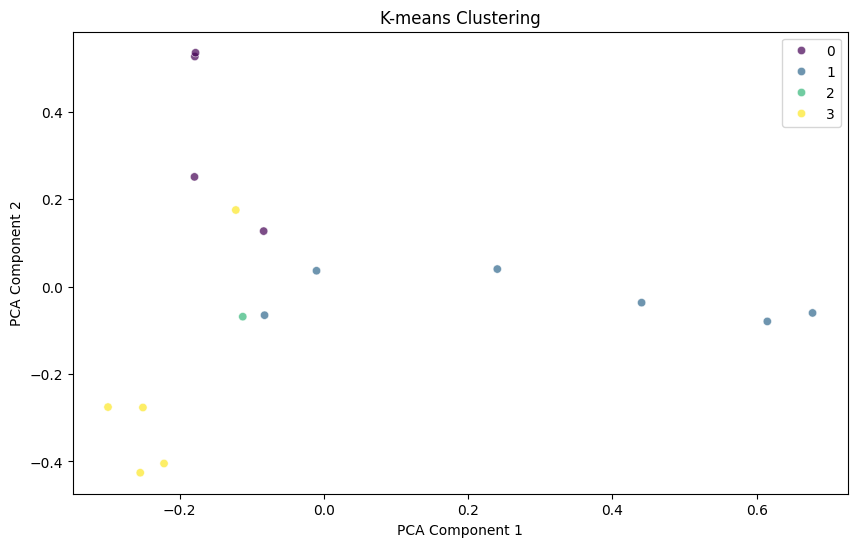


K-means Cluster Distribution:
true_category  Arts_Culture  Business  Politics  Sports
cluster                                                
0                       1.0       2.0       1.0     0.0
1                       1.0       1.0       1.0     3.0
2                       1.0       0.0       0.0     0.0
3                       1.0       1.0       2.0     1.0

Top Terms per Cluster:
Cluster 0: tariff, uk, trump, carney, heigl, business, trade, said, feedback, india
Cluster 1: sponsored, undo, ronaldo, land, inter, stak, barcelona, team, football, trap
Cluster 2: morgan, death, foundation, trustee, art, war, angel, painting, dragon, evelyn
Cluster 3: advertisement, skip, hip, article, transgender, court, theory, furniture, russian, trump

Hierarchical Clustering:
Silhouette Score: 0.064


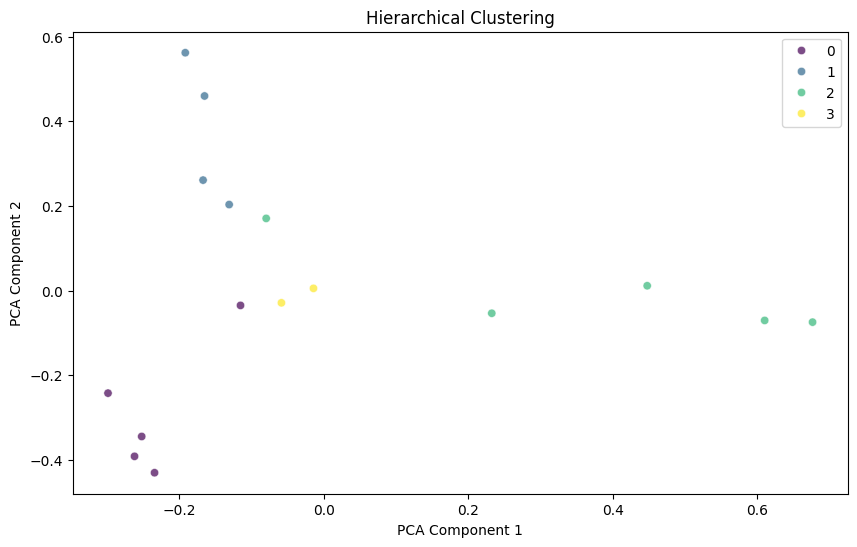


Hierarchical Cluster Distribution:
true_category  Arts_Culture  Business  Politics  Sports
cluster                                                
0                       2.0       1.0       1.0     1.0
1                       0.0       2.0       2.0     0.0
2                       2.0       1.0       1.0     1.0
3                       0.0       0.0       0.0     2.0

Top Terms per Cluster:
Cluster 0: advertisement, skip, morgan, hip, article, war, theory, furniture, russian, credit
Cluster 1: tariff, trump, uk, carney, business, trade, transgender, court, said, india
Cluster 2: sponsored, undo, ad, land, heigl, stak, trap, dubai, villa, unsold
Cluster 3: ronaldo, inter, barcelona, portugal, milan, son, score, alnassr, cnns, link

True Category Distribution:
true_category
Arts_Culture    4
Business        4
Politics        4
Sports          4
Name: count, dtype: int64


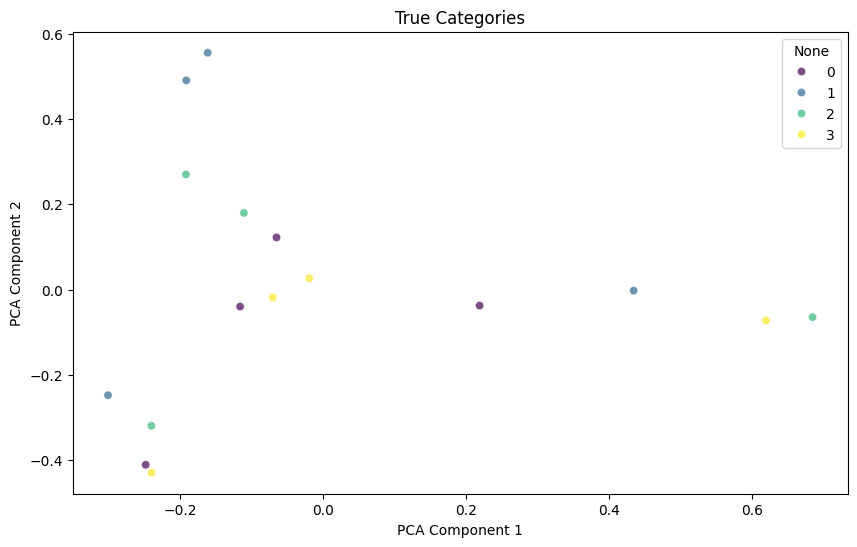

In [60]:
if __name__ == "__main__":
    main()

In [61]:
df.to_csv('articles_data.csv', index=False, encoding='utf-8')
print("DataFrame saved to 'articles_data.csv'")

DataFrame saved to 'articles_data.csv'


4.	Create a web based platform that displays a cluster and the urls of related stories in that cluster.                                                                                                                            [30]

news_clustering_app.py is the streamlit app